# van der Waals Equation
- $R\cdot T = (P + \frac{a \cdot n^2}{v^2})(V- b \cdot n)$
- $P = \frac{R\cdot T}{V-B} - \frac{a}{V^2}$

where,
- V := Volume
- T := Temperature at pressure P
- P := Pressure 
- a, b := van der Waals constants
    - a provides a measure of the average attraction of the molecules,
    - b adjusts for the volume occupied by the gas particle
- R := 8.314462618... kg⋅m2⋅s−2⋅K−1⋅mol−1. (Adjust this accordingly)

## Bisection Method
- over an interval [a,b] we want to find check if $f(a) \cdot f(b) < 0$
- then we need to find the midpoint, $c = \frac{a + b}{2}$
- next we will check if the signs are the same for f(a) and f(c) or check if f(b) anf f(c) have the same signs

In [ ]:
import numpy as np

def van_der_waals(V, P, T, a, b, n, R=0.0821):
    a_converted = a * 0.9869  # Convert a from bar L^2/mol^2 to atm L^2/mol^2
    return P*V**3 - (P*n*b + n*R*T)*V**2 + a_converted*n**2*V - a_converted*n**3*b

def bisection(f, a, b, TOL, count=0):
    '''
    This function will return the root for a given function f. 
    REQUIRED: f(a)*f(b) < 0.
    |f(c)| < tol with c the midpoint.
    between a and b Recursive implementation
    params:
    - f: defined as the function we want to find a root for that is continuous and f(a)*f(b) < 0
    '''

    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")
    
    c = (a + b)/2
    count += 1  # Increment the count

    if np.abs(f(c)) < TOL:
        return c, count  # Return the root and the count
    
    elif np.sign(f(a)) == np.sign(f(c)):
        return bisection(f, c, b, TOL, count)
    
    elif np.sign(f(b)) == np.sign(f(c)):
        return bisection(f, a, c, TOL, count)

# Initial guess for V (in L).
x0 = 1.0
# Parameters for finding the volume using van der Waals equation
P = 50
T = 273
a = 1.355
b = 0.03201
n = 5
R = 0.0821

f = lambda V: van_der_waals(V, P=P, T=T, a=a, b=b, n=n, R=R)

root, iterations = bisection(f, 0.1, 10, TOL=1e-5)  # Changed the interval to [0.1, 10] as negative volumes are not physical
print(f"The root by bisection method is: {root}")
print(f"Number of iterations: {iterations}")


## Newtons Method
$$x_{n+1} = x_n - \frac{f(x_n)}{f^{\prime}(x_n)}$$
- where f is differentiable and continuous
By expanding out our van der Waals equation, we get

- $f(V) = P\cdot V^3 - V^2(P \cdot b \cdot n + R \cdot T \cdot) - (a \cdot V \cdot n) - (a \cdot b \cdot n^3)$
- $f^\prime(V) = 3\cdot p \cdot V^2 - 2(P\cdot n \cdot b - R\cdot T \cdot n)V + a\cdot n^2$

In [5]:
import numpy as np

def van_der_waals(V, P, T, a, b, n, R=0.0821):
    """
    Computes the van der Waals equation adjusted to zero.
    """
    a_converted = a * 0.9869  # Convert a from bar L^2/mol^2 to atm L^2/mol^2
    return P * V**3 - (P * n * b + n * R * T) * V**2 + a_converted * n**2 * V - a_converted * n**3 * b

def derivative_van(V, P, T, a, b, n, R=0.0821):
    """
    Computes the derivative of the van der Waals equation with respect to V.
    """
    a_converted = a * 0.9869
    return 3 * P * V**2 - 2 * (P * n * b + n * R * T) * V + a_converted * n**2

def newtons_method(f, f_prime, x0, tol=1e-8, max_iterations=100, verbose=False):
    """
    Applies Newton's method to find the root of the equation f(x) = 0.
    """
    x = x0
    converged = False

    for i in range(max_iterations):
        fx = f(x)
        fpx = f_prime(x)

        # Check if derivative is zero
        if fpx == 0:
            raise ValueError(f"Derivative is zero at x = {x}.")
        
        # Update x
        x_new = x - fx / fpx

        # Check convergence criteria
        if np.abs(f(x_new)) < tol and np.abs(x_new - x) / np.abs(x) < tol:
            converged = True
            x = x_new
            break

        x = x_new

        if verbose:
            print(f"Iteration {i}: x = {x}, f(x) = {fx}")

    # Final convergence check
    if not converged:
        print("Warning: Newton's method did not converge after the maximum number of iterations.")
    
    return x, i + 1, converged


# Parameters for finding the volume using van der Waals equation
P = 50  # Pressure in atm
T = 273  # Temperature in Kelvin
a = 1.355  # Attraction parameter in bar L^2/mol^2
b = 0.03201  # Volume correction in L/mol
n = 5  # Number of moles

# Initial guess for V (in L).
x0 = 1.0

# Define the function and its derivative
f = lambda V: van_der_waals(V, P=P, T=T, a=a, b=b, n=n)
f_prime = lambda V: derivative_van(V, P=P, T=T, a=a, b=b, n=n)

# Apply Newton's method
root, iterations, has_converged = newtons_method(f=f, f_prime=f_prime, x0=x0, verbose=True)

# Output the results
if has_converged:
    print(f"Newton's Method converged: {root} L after {iterations} iterations.")
else:
    print(f"Newton's Method did not converge after {iterations} iterations.")

Newton's Method: 2.1083184613526287 L, 31 iterations taken



- Example from JHP

In [4]:
import numpy as np

def newtons_method(f, f_prime, x0, tol, max_iterations):
    '''
    params:
    - f: the function you are trying to find the roots for
    - f_prime: defined as the derivative of the function
    - x0: the initial guess of the function for finding the root (if x0 is close, convergence is more likely)
    - tol: tolerance to set if the previous iterated x is close to x
    - max_iteration: the amount of loops before breaking the function so theres no infinite loop
    '''
    x_values = [x0]
    x = x0
    for i in range(max_iterations):
        x_pre = x
        x = x-(f(x)/f_prime(x))

        if np.abs(x - x_pre) < tol:
            break
        
        x_values.append(x)

    if i == max_iterations -1:
        print(" Last iteration is completed, Newton method might not have converged. \n     ")
    
    return x_values, i+1

f = lambda x: x**2 - 2
f_prime = lambda x: 2*x
x0 = 1

newton_x_values, newton_iters = newtons_method(f = f, f_prime = f_prime, x0 = x0, tol=1e-8, max_iterations=30)
print(f"Newton's Method : {newton_x_values[-1]}, {newton_iters} iterations taken")

Newton's Method : 1.4142135623746899, 5 iterations taken


## Secant method (Newtons but with quotient difference instead of $f^{\prime}(x_n)$)

$$x_{n+1} = x_n - f(x_n)\frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}$$

In [8]:
import numpy as np

def secant_method(f, x0, x1, tol, max_iterations, verbose=False):
    '''
    Uses the Secant method to find a root of a function.
    
    Parameters:
    - f: The function for which to find the root.
    - x0, x1: The initial two guesses for the root.
    - tol: The tolerance for the convergence of the method.
    - max_iterations: The maximum number of iterations to perform.
    - verbose: Whether to print the process (default: False).
    
    Returns:
    - A dictionary with the root, the number of iterations, and a flag indicating convergence.
    '''
    
    if tol <= 0:
        raise ValueError("Tolerance must be positive.")
    
    for i in range(max_iterations):
        f_x0 = f(x0)
        f_x1 = f(x1)
        denominator = (f_x1 - f_x0)
        
        # Avoid division by zero
        if denominator == 0:
            print("Warning: Division by zero encountered in the Secant method.")
            return {"root": None, "iterations": i, "converged": False}

        x_new = x1 - (f_x1 * (x1 - x0) / denominator)
        
        if verbose:
            print(f"Iteration {i+1}: x = {x_new}, f(x) = {f(x_new)}")
        
        if np.abs(x_new - x1) < tol:
            return {"root": x_new, "iterations": i + 1, "converged": True}
        
        x0, x1 = x1, x_new
        
    return {"root": x1, "iterations": max_iterations, "converged": False}

# Parameters for finding the root using the van der Waals equation
x0, x1 = -3, 3
P = 50
T = 273
a = 1.355
b = 0.03201
n = 5
R = 0.0821

# Define the function using the van der Waals equation
f = lambda V: van_der_waals(V, P=P, T=T, a=a, b=b, n=n, R=R)

# Apply the Secant method
result = secant_method(f, x0=x0, x1=x1, tol=1e-8, max_iterations=30, verbose=True)

# Output the results
if result["converged"]:
    print(f"The Secant Method converged: {result['root']} after {result['iterations']} iterations.")
else:
    print(f"The Secant Method did not converge after {result['iterations']} iterations.")


The root found by Secant Method: 2.1083184613526393, 8 iterations taken


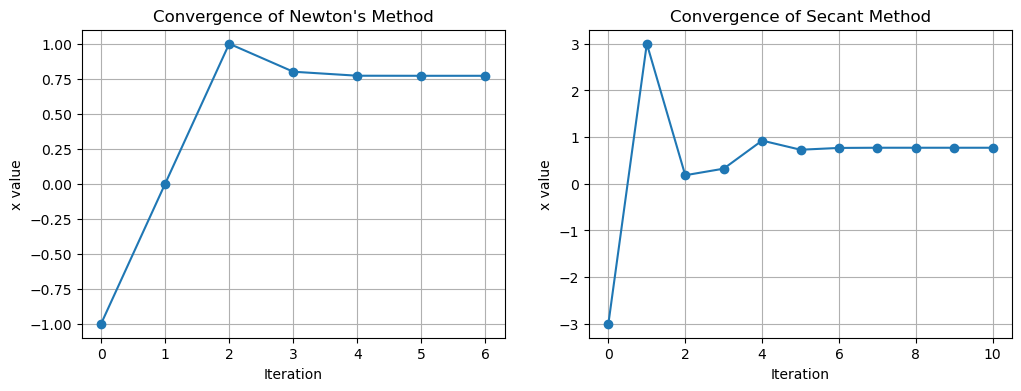

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Newton's method
ax[0].plot(range(len(newton_x_values)), newton_x_values, marker='o')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('x value')
ax[0].set_title('Convergence of Newton\'s Method')
ax[0].grid(True)

# Secant method
ax[1].plot(range(len(sec_x_value)), sec_x_value, marker='o')  # Assuming you have sec_x_values
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('x value')
ax[1].set_title('Convergence of Secant Method')
ax[1].grid(True)

plt.show()


Ideas for comparing efficiency
- Comparing the time difference to calculate the root
- Comparing the error between true and predicted values
- Comparing the sensitivity of the initial guess
- Obviously ease of Use